In [1]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

In [0]:
from IPython.display import clear_output # clears output of cell, say to show multiple plots but show only most recent one

# Dataset

Task: To predict nationality a name (varying length) belongs to.  
Therefore, sequence model since sequence of characters, have to encode each character and predict one class (usual softmax) 

  

---

  
Sequence Tasks:  
Sequence to Class (input is sequence, output is just one class) - what we are doing currently   
Sequence to Sequence Type 1 (input is sequence, output is sequence where there is an output corresponding to each item in the input e.g. POS)  
Sequence to Class (input is sequence, output is sequence, but there is not one output for each word, but be more or less e.g. transliteration - converting english word to hindi)

In [0]:
languages = []
data = []
X = []
y = []

with open('name2lang.txt','r') as f:
  for line in f:
    line = line.split(',')
    name = line[0].strip()
    lang = line[1].strip()
    if not lang in languages:
      languages.append(lang)
    X.append(name)
    y.append(lang)
    data.append((name, lang))

In [7]:
n_languages = len(languages)
print(n_languages)

18


There are 18 languages in this dataset.

In [9]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [8]:
print(data[0:10])

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


# Train-test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 61, stratify = y)

(Both X and y should have the same dimensions)

In [19]:
print(X_train)

['Kaufman', 'Chandler', 'Agar', 'Essa', 'Makhagonov', 'Prokudin', 'Porus', 'Lowry', 'Nezvigin', 'Cove', 'Peach', 'Newlands', 'Bajov', 'Chukhnovsky', 'Naser', 'Gaspirovich', 'Vykhodtsev', 'Chuvilkin', 'Maksimchuk', 'Dandy', 'Abramenko', 'Pechernikov', 'Abramchikoff', 'Jilkin', 'Caro', 'Wilkin', 'Said', 'Curry', 'Paradzhanov', 'Finchuk', 'Adokhin', 'Chaplin', 'Baikaloff', 'Usiskin', 'Salib', 'Broadbent', 'Jimulev', 'Avilov', 'Atepko', 'Mangnall', 'Marconi', 'Matsak', 'Dobrosotsky', 'Artenov', 'Zenkov', 'Ellard', 'Gladilschikov', 'Tucker', 'Pahomov', 'Judashkin', 'Ryjikh', 'Abukhov', 'Lake', 'Kachalov', 'Jakimychev', 'Benjamin', 'Anodin', 'Eberling', 'Gulley', 'Inglethorpe', 'Raitses', 'Rompaeij', 'Long', 'Nepi', 'Chikamatsu', 'Harionovsky', 'Khoury', 'Zhukov', 'Babarykin', 'Gaber', 'Ryzhenkov', 'Gross', 'Becke', 'Vyshnegradsky', 'Olley', 'Chalov', 'Morcos', 'Scott', 'Lunt', 'Soler', 'Sponer', 'Yankilevsky', 'Seaghdha', 'Gwang', 'Cookson', 'Martinkus', 'Tokmagambetov', 'Yugov', 'Titmarsh'

In [20]:
print(len(X_train), len(X_test))

16040 4010


# Encoding names and languages

Since output is a class, can use one hot encoding easily.  
But input is a sequence, so have to encode each character.

In [0]:
# list of all characters possible in a name
all_letters = string.ascii_letters + " .,;"
n_letters = len(all_letters)

Encode the name

In [0]:
# Let encoding be one hot encoding for each character, where the hot bit is the index of the char in the above string of all letters
def name_rep(name):
  rep = torch.zeros(len(name), 1, n_letters)
  for index, letter in enumerate(name):
    pos = all_letters.find(letter)
    rep[index][0][pos] = 1
  return rep

Encode the language

In [0]:
# Don't require one hot encoding, just label sufficient
def lang_rep(lang):
  return torch.tensor([languages.index(lang)], dtype = torch.long)

In [27]:
name_rep('Almeida')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

7 letters in name, so 7 vectors

In [28]:
lang_rep('Dutch')

tensor([7])

Label of Dutch in languages array

# Basic Visualisation

Distribution of languages in our dataset

In [0]:
count = {}

for l in languages:
  count[l] = 0
for d in data:
  count[d[1]] += 1

In [30]:
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


Highly non-uniform

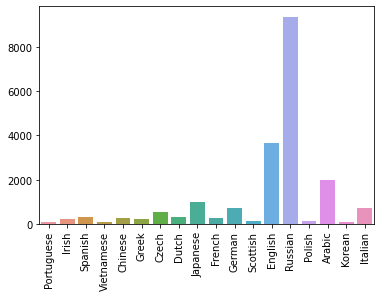

In [32]:
plt_ = sns.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation = 90)
plt.show()

Model might learn Russian names too well and predict them well since lots of data, but less training on the rest.  
Hence, have to see not the overall accuracy, but accuracy for each language.

Therefore, baseline is not to pick names from each language equally, but pick according to the distribution, more for Russian.

Thus, baseline testing is easy, but training isn't

# Basic network and testing inference

In [0]:
class RNN_net(nn.Module):
  # just setting up layers, not computing anything
  # input_size : size of encoding of one character in the input (i.e. number of letters, here)
  # hidden_size : the hidden layer though looks like one can be any number of layers
  # output_size : the number of labels (number of languages, here)
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN_net, self).__init__() # parent's (NN's) init
    self.hidden_size = hidden_size

    # both below are Linear (fully connected)
    # just mention input size and output size. Weights, biases etc taken care of by library (encapsulated)

    # i2h is the intersection of the previous character's output and current input character, hence concatenation of hidden size (previous input size - coming out of hidden layer) and input size (current input size). Output should of course be hidden size again
    self.i2h = nn.Linear(input_size + hidden_size, hidden_size) # "concatenation (i.e. both preserved)", not addition (corresponding elements added), of input and hidden of previous
    
    # i2o is the intersection of the h and the output o. (the final output layer part). Input is the computed h (hidden_size) and the current input (input_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)

    # Note only 1 layer used for both above transformations, but can have more
    
    # Final output
    self.softmax = nn.LogSoftmax(dim = 1)


  # where layers are put to use
  def forward(self, input_, hidden):
    combined = torch.cat((input_, hidden), 1) # concatenate hidden and input in right direction (1, here. 1 means column always in a 2D vector, and usually "along". So concatenate - NOT ADDS - along row. Next to each other)
    hidden = self.i2h(combined) # comput hidden value
    output = self.i2o(combined) # compute output
    output = self.softmax(output) # compute softmax
    return output, hidden # return both output and hidden

  # the first time (beginning of sequence) the hidden vector is not present, so call this function the first time
  def init_hidden(self):
    return torch.zeros(1, self.hidden_size) # Randomly initialised to 1, can use something else too